<div style="line-height:1.2;">

<h1 style="color:#0AE42F; margin-bottom: 0.2em;">Network clustering</h1>

</div>

<div style="line-height:1.2;">

<h4 style="margin-top: 0.2em; margin-bottom: 0.5em;">Clustering in graphs to group nodes in communities.
It takes into account network topology and dependencies. <br>
Clustering alg:<br>
&emsp; - Louvain <br>
&emsp; - Propagation
</h4>

</div>

<div style="margin-top: 5px;">
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline; margin-bottom: 0;">Keywords:</h3> "&emsp ;"  inserts em space in markdown cells to add TAB + networkx + slicing dict + print dict with json + sknetwork
</span>
</div>


<div style="line-height:0.45">
<h1 style="color:#0AE42F  "> Network clustering </h1>
<div style="margin-top: -5px;">
<div style="line-height:1.3">
<h4> Clustering in graphs to group nodes in communities.
It takes into account network topology and dependencies. <br>
Clustering alg:  <br>     
&emsp; - Louvain <br>       
&emsp; - Propagation       
</h4>
</div>
<div style="margin-top: -5px;">
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3> "&emsp ;" insert em space in markdown cells to add TAB + networkx + slicing dict + print dict with json + sknetwork
</span>
</div>

In [1]:
import json
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sknetwork.data import karate_club, miserables
from sklearn.metrics.pairwise import pairwise_distances
from sknetwork.clustering import Louvain, PropagationClustering, get_modularity
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, pairwise_distances_argmin_min

import networkx as nx
#from networkx.algorithms.community import normalized_cut_size #normalized_cut_size was removed in last version
from networkx.algorithms.community import modularity, greedy_modularity_communities

In [2]:
""" Create an instance of the Louvain clustering algorithm """

louvain = Louvain(modularity='Newman', n_aggregations=10, verbose=True, sort_clusters=True) # modularity = objective function to maximize. [Dugue, Newman Potts dugue (default one)]

<div style="line-height:0.65">
<h2 style="color:#0AE42F  "> 1) Louvain clustering </h2>
</div>
<div style="line-height:1">
<div style="margin-bottom: -11px;">
<h4>Recap:</h4>
</div>
The Louvain algorithm is a community detection algorithm used to identify clusters dividing nodes in a graph into distinct groups based <br> on the connections or interactions between nodes.         
It optimizes the modularity metric, which measures the strength of connections within clusters compared to the expected connections in a random network. 
Two-phase process continuosly repeated:

+ Greedy Modularity Optimization => each node is initially assigned to its own unique cluster.          
Then, the algorithm iteratively moves nodes between clusters to increase the modularity of the graph. 

+ Agglomeration: The clusters identified in the previous phase are treated as nodes, and the algorithm constructs <br> a new graph where nodes represent clusters.     
The edges between clusters are weighted based on the sum of the edge weights between nodes in the original graph. 


In [3]:
G = nx.karate_club_graph()
print("Node Degree")
for v in G:
    print(f"{v:4} {G.degree(v):6}")

Node Degree
   0     16
   1      9
   2     10
   3      6
   4      3
   5      4
   6      4
   7      4
   8      5
   9      2
  10      3
  11      1
  12      2
  13      5
  14      2
  15      2
  16      2
  17      2
  18      2
  19      3
  20      2
  21      2
  22      2
  23      5
  24      3
  25      3
  26      2
  27      4
  28      3
  29      4
  30      4
  31      6
  32     12
  33     17


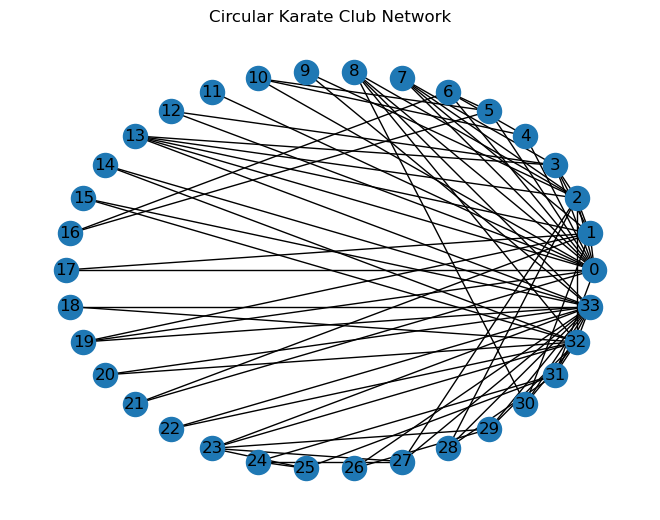

In [4]:
# Visualize graph with a circular layout.
nx.draw_circular(G, with_labels=True)
#or
# nx.draw(G, pos=nx.circular_layout(G), **kwargs)
plt.title("Circular Karate Club Network")
plt.show()

In [5]:
# Load the Karate Club graph (adjacency matrix)
graph_karate = karate_club()

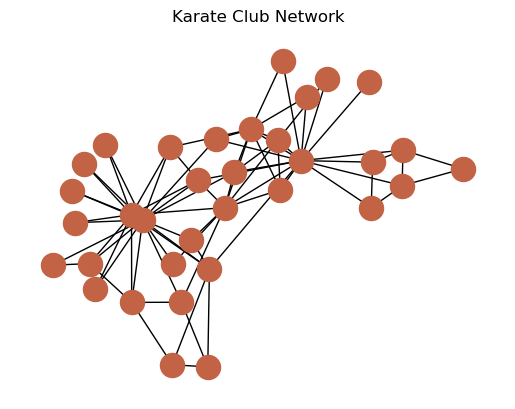

In [6]:
to_visualize = nx.Graph(graph_karate)
plt.title("Karate Club Network")
nx.draw(to_visualize, node_color = '#C26345')

In [7]:
# Apply the Louvain algorithm to cluster nodes in the graph
labels = louvain.fit_predict(graph_karate)

Starting with 34 nodes.
Aggregation 1 completed with 6 clusters and  0.4111604690551758 increment.
Aggregation 2 completed with 4 clusters and  0.05744576454162598 increment.
Aggregation 3 completed with 4 clusters and  0.0 increment.


In [8]:
# Count the number of unique clusters
num_clusters = len(set(labels))
print(f"Number of clusters: {num_clusters}")

Number of clusters: 4


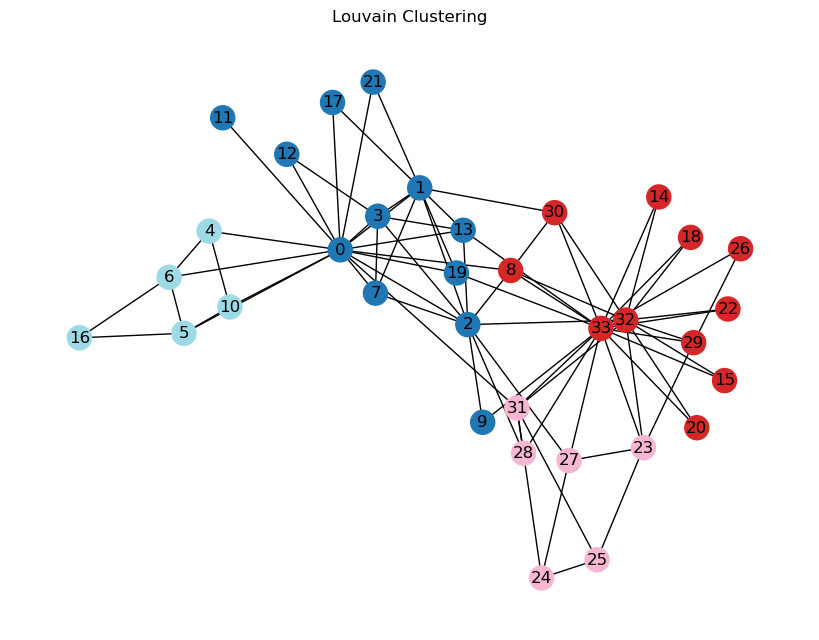

In [9]:
# Convert the adjacency matrix to a NetworkX graph
# NB networkx methods "to_numpy_matrix" and "from_numpy_matrix" are deprecated ! 
graph_nx_kara = nx.from_numpy_array(graph_karate)

# Create a dictionary to map node IDs to their cluster labels
node_color_map = {node: label for node, label in enumerate(labels)}

# Draw the graph with nodes colored by their cluster labels
plt.figure(figsize=(8, 6))
nx.draw(graph_nx_kara, node_color=[node_color_map[node] for node in graph_nx_kara.nodes()], with_labels=True, cmap=plt.cm.tab20)
plt.title("Louvain Clustering")
plt.show()

<h2 style="color:#0AE42F  "> 2) Clustering by label propagation </h2>

First tentative is "wrong", to show a case with 1 single cluster.     
The propagation clustering method will try to fit an meaningless adjacent matrix 

In [10]:
# Create a PropagationClustering instance
propagation = PropagationClustering()

# Extract the adjacency matrix from the graph
graph_karate = karate_club()

# This is simply the the Flatten adjacenct matrix at the beginning! 
# This lead to the creation of single unique label for all data points, if fitted! 
adjacency = graph_karate.data

# Perform clustering using propagation algorithm
labels = propagation.fit_predict(adjacency)
# Get the number of unique labels (clusters)
num_clusters = len(set(labels))

print(labels)
print("Number of clusters:", num_clusters)

[0]
Number of clusters: 1


In [11]:
# In fact the adjacency matrix contains all points
adjacency

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [12]:
# Create a NetworkX graph from the adjacency matrix
G = nx.from_numpy_array(graph_karate)
# Get a list of unique labels
unique_labels = list(set(labels))
unique_labels

[0]

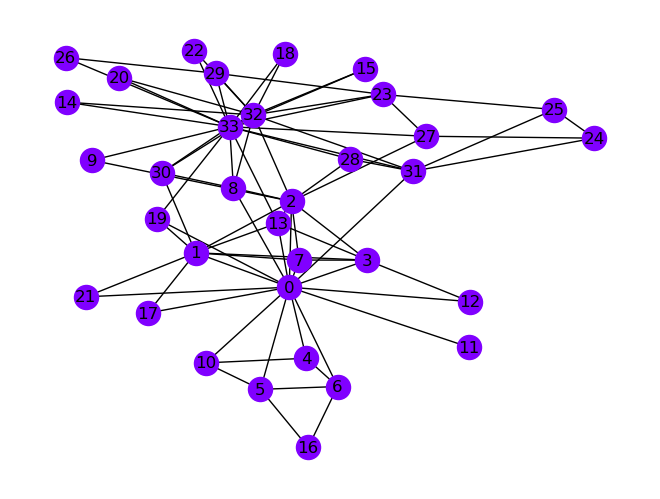

In [13]:
# Create a color map from labels to colors
colors = cm.rainbow(np.linspace(0, 1, num_clusters))

# Create a mapping from labels to colors
label_color_map = dict(zip(unique_labels, colors))

# Map each node to the color corresponding to its label
node_colors = [label_color_map[label] for label in labels]

# Draw the graph
nx.draw(G, node_color=node_colors, with_labels=True)
plt.show()

<h3 style="color:#0AE42F  "> 2.1) Clustering by label propagation </h3>

In [14]:
""" Try another dataset to work with """
adjacency_mise = miserables()
adjacency_mise.shape

(77, 77)

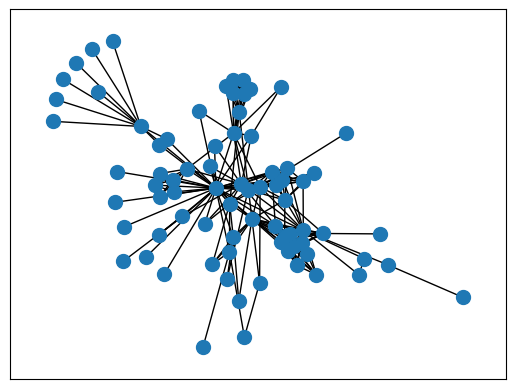

In [15]:
""" Transform data to graph 
# Set the seed OUTSIDE for consistent layout, to obtain the NetworkX (spring_layout) algorithm is non-deterministic, 
so the graph layout can vary each time you run the code, resulting in slightly different positions of nodes and edges.
"""
np.random.seed(42)
graph = nx.Graph(adjacency_mise)
plt.show()
nx.draw_networkx(graph, node_size=100, with_labels=False)

In [16]:
# Positioning using a layout algorithm
pos = nx.spring_layout(graph, seed=42)  
type(pos)
some_pos_to_show = {key: value for i, (key, value) in enumerate(pos.items()) if i < 10}
some_pos_to_show

{0: array([-0.37387756,  0.26649196]),
 1: array([-0.58153795,  0.58714683]),
 2: array([-0.26323362,  0.21411109]),
 3: array([-0.29450774,  0.18955035]),
 4: array([-0.65140249,  0.53234633]),
 5: array([-0.70605052,  0.46272889]),
 6: array([-0.494195 ,  0.6204732]),
 7: array([-0.74826966,  0.28777699]),
 8: array([-0.55802774,  0.4119592 ]),
 9: array([-0.7367792 ,  0.37885003])}

In [17]:
node_labels = [f"Label_{i}" for i in range(adjacency_mise.shape[0])]
node_labels[:20]

['Label_0',
 'Label_1',
 'Label_2',
 'Label_3',
 'Label_4',
 'Label_5',
 'Label_6',
 'Label_7',
 'Label_8',
 'Label_9',
 'Label_10',
 'Label_11',
 'Label_12',
 'Label_13',
 'Label_14',
 'Label_15',
 'Label_16',
 'Label_17',
 'Label_18',
 'Label_19']

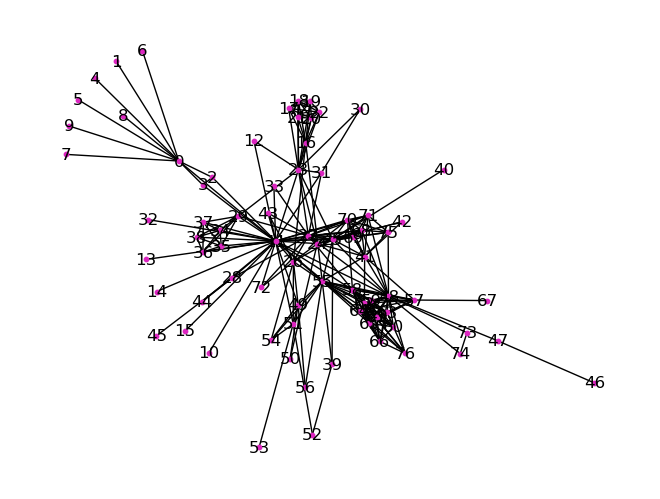

In [18]:
# Visualize the graph with node labels
nx.draw(graph, pos, node_color='#DC26C0', node_size=10, with_labels=True)

In [19]:
# Create a PropagationClustering instance
propagation = PropagationClustering()
# Perform clustering using propagation algorithm
labels = propagation.fit_predict(adjacency_mise)
# Get the number of unique labels (clusters)
num_clusters = len(set(labels))

print(labels)
print("Number of clusters:", num_clusters)

[0 0 0 0 0 0 0 0 0 0 3 3 1 3 3 3 1 1 1 1 1 1 1 1 1 1 2 1 1 3 1 1 3 1 3 3 3
 3 3 2 1 1 1 2 1 1 4 4 4 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 2 5
 5 1 4]
Number of clusters: 6


In [20]:
# Create a NetworkX graph from the adjacency matrix
G = nx.from_numpy_array(adjacency_mise)
# Get a list of unique labels
unique_labels = list(set(labels))
unique_labels

[0, 1, 2, 3, 4, 5]

In [21]:
# Create a color map from labels to colors
colors = cm.rainbow(np.linspace(0, 1, num_clusters))

# Create a mapping from labels to colors
label_color_map = dict(zip(unique_labels, colors))
print(colors)
# Convert numpy arrays to list 
label_color_map_converted = {str(key): value.tolist() for key, value in label_color_map.items()}
pretty_dict = json.dumps(label_color_map_converted, indent=4)
print(pretty_dict)

[[5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e-01 5.87785252e-01 9.51056516e-01 1.00000000e+00]
 [3.00000000e-01 9.51056516e-01 8.09016994e-01 1.00000000e+00]
 [7.00000000e-01 9.51056516e-01 5.87785252e-01 1.00000000e+00]
 [1.00000000e+00 5.87785252e-01 3.09016994e-01 1.00000000e+00]
 [1.00000000e+00 1.22464680e-16 6.12323400e-17 1.00000000e+00]]
{
    "0": [
        0.5,
        0.0,
        1.0,
        1.0
    ],
    "1": [
        0.09999999999999998,
        0.5877852522924731,
        0.9510565162951535,
        1.0
    ],
    "2": [
        0.30000000000000004,
        0.9510565162951535,
        0.8090169943749475,
        1.0
    ],
    "3": [
        0.7,
        0.9510565162951536,
        0.5877852522924731,
        1.0
    ],
    "4": [
        1.0,
        0.5877852522924732,
        0.30901699437494745,
        1.0
    ],
    "5": [
        1.0,
        1.2246467991473532e-16,
        6.123233995736766e-17,
        1.0
    ]
}


In [22]:
""" Map each node to the color corresponding to its label """
node_colors = [label_color_map[label] for label in labels]

num_elements = 20
random_elements = random.sample(node_colors, num_elements)
print(node_colors)

random_elements

[array([0.5, 0. , 1. , 1. ]), array([0.5, 0. , 1. , 1. ]), array([0.5, 0. , 1. , 1. ]), array([0.5, 0. , 1. , 1. ]), array([0.5, 0. , 1. , 1. ]), array([0.5, 0. , 1. , 1. ]), array([0.5, 0. , 1. , 1. ]), array([0.5, 0. , 1. , 1. ]), array([0.5, 0. , 1. , 1. ]), array([0.5, 0. , 1. , 1. ]), array([0.7       , 0.95105652, 0.58778525, 1.        ]), array([0.7       , 0.95105652, 0.58778525, 1.        ]), array([0.1       , 0.58778525, 0.95105652, 1.        ]), array([0.7       , 0.95105652, 0.58778525, 1.        ]), array([0.7       , 0.95105652, 0.58778525, 1.        ]), array([0.7       , 0.95105652, 0.58778525, 1.        ]), array([0.1       , 0.58778525, 0.95105652, 1.        ]), array([0.1       , 0.58778525, 0.95105652, 1.        ]), array([0.1       , 0.58778525, 0.95105652, 1.        ]), array([0.1       , 0.58778525, 0.95105652, 1.        ]), array([0.1       , 0.58778525, 0.95105652, 1.        ]), array([0.1       , 0.58778525, 0.95105652, 1.        ]), array([0.1       , 0.5877

[array([1.        , 0.58778525, 0.30901699, 1.        ]),
 array([0.1       , 0.58778525, 0.95105652, 1.        ]),
 array([1.        , 0.58778525, 0.30901699, 1.        ]),
 array([0.3       , 0.95105652, 0.80901699, 1.        ]),
 array([0.5, 0. , 1. , 1. ]),
 array([0.1       , 0.58778525, 0.95105652, 1.        ]),
 array([0.1       , 0.58778525, 0.95105652, 1.        ]),
 array([0.1       , 0.58778525, 0.95105652, 1.        ]),
 array([0.7       , 0.95105652, 0.58778525, 1.        ]),
 array([0.1       , 0.58778525, 0.95105652, 1.        ]),
 array([1.        , 0.58778525, 0.30901699, 1.        ]),
 array([0.3       , 0.95105652, 0.80901699, 1.        ]),
 array([0.7       , 0.95105652, 0.58778525, 1.        ]),
 array([1.        , 0.58778525, 0.30901699, 1.        ]),
 array([1.        , 0.58778525, 0.30901699, 1.        ]),
 array([0.3       , 0.95105652, 0.80901699, 1.        ]),
 array([0.1       , 0.58778525, 0.95105652, 1.        ]),
 array([0.5, 0. , 1. , 1. ]),
 array([0.5,

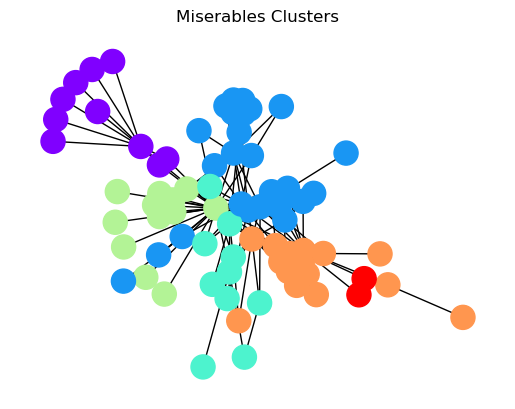

In [23]:
""" Draw the graph with highlighted clusters """
# Set the same random seed as before to show the same graph!!! (and obtain same results when the cell is run again)
np.random.seed(42)

plt.title("Miserables Clusters")
nx.draw(G, node_color=node_colors, with_labels=False)

<div style="margin-bottom: -20px;">
<h3 style="color:#0AE42F  "> Metrics </h3>
</div>
The modularity of a clustering is a measure of the quality of a partition of nodes into communities within a network. <br>
It quantifies the extent to which the edges within communities are denser compared to the edges between communities. <br>    
=> The modularity score ranges from -1 to 1, with higher values indicating better community structure.    

In [24]:
# Calc modularity
np.round(get_modularity(adjacency_mise, labels), 2)

0.44

<div style="margin-bottom: -20px;">
<h4> Recap:</h4>        
</div>
<div style="margin-bottom: -1px;">
Some of the available Unsupervised learning metrics:       
</div>

1. Silhouette Score: 
2. Calinski-Harabasz Index 
3. Davies-Bouldin Index
4. Dunn Index

In [25]:
# Calculate Silhouette Score
silhouette = silhouette_score(adjacency_mise, labels)
silhouette

-0.2179909414310269

In [26]:
# Calculate Davies-Bouldin Index (need that matrix is tranformed to array)
davies_bouldin = davies_bouldin_score(adjacency_mise.toarray(), labels)
davies_bouldin

2.5869826362619075

In [27]:
# Calculate Calinski-Harabasz Index (need that matrix is tranformed to array)
calinski_harabasz = calinski_harabasz_score(adjacency_mise.toarray(), labels)
calinski_harabasz

3.3707763616110515

<div style="margin-bottom: -20px;">
<h4> Internal edge density: 
</h4>      
</div>
It is the proportion of actual edges present in a subgraph compared to the maximum possible number of edges that could exist within that subgraph.      <br>
It provides an indication of how well connected the nodes within the subgraph are to each other.     

+ Higher value => densely connected subgraph
+ Lower values => less connected subgraph.

In [28]:
def internal_edge_density(G, nodes):
    """ Calculate the internal edge density of a subgraph (a community).

    Parameters:
        - G  The input graph G [networkx.Graph]
        - List of nodes defining the subgraph [list]

    Returns:
        - Internal edge density of the subgraph [float]
    """

    G_subgraph = G.subgraph(nodes)
    
    actual_edges = nx.number_of_edges(G_subgraph)
    possible_edges = len(nodes) * (len(nodes)-1) / 2
    
    return actual_edges / possible_edges

### => Average_distance:

In [29]:
def average_distance(G, nodes):
    """ Calculate the average pairwise distance between nodes in a subgraph.

    Parameters:
        - G  The input graph G [networkx.Graph]
        - List of nodes defining the subgraph [list]
        
    Details: 
        - To avoid the TypeError nx.all_pairs_shortest_path_length(G_subgraph) return a generator,\\
        so it must transform it in a dictionary\\
        to index into the distances since a generator' object is not subscriptable 
    
    Returns:
        - Average pairwise distance between nodes in the subgraph [float]
    """    
    G_subgraph = G.subgraph(nodes)
    

    distances = dict(nx.all_pairs_shortest_path_length(G_subgraph)) 

    total_distance = 0
    num_pairs = 0
    for node1 in nodes:
        for node2 in nodes:
            if node1 != node2:
                total_distance += distances[node1][node2]
                total_distance = 1
                num_pairs += 1
                
    return total_distance / num_pairs

In [30]:
# Get nodes included in the first community  
community1 = [node for node, label in enumerate(labels) if label == 0]
community1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [31]:
# Get the internal edge density 
density = internal_edge_density(G, community1)
# Calculate the average distance
avg_dist = average_distance(G, community1)  

print(f"Internal edge density of community 1: {density}")
print(f"Average distance of community 1: {avg_dist}")

Internal edge density of community 1: 0.2222222222222222
Average distance of community 1: 0.011111111111111112


<div style="margin-bottom: -20px;">
<h4> Dunn Index
</h4>      
</div> 

The Dunn Index provides a measure of the separation between clusters and the compactness of the individual clusters.      
It helps to assess the trade-off between the inter-cluster distance and intra-cluster distance.      
Where:          
+ inter-cluster distance is tje distances between data points.         
+ intra-cluster distance is the distances between data points within the same cluster.         

It is particularly useful when you don't have a ground truth for cluster labels, as it provides a quantitative measure of cluster separation and compactness.       
Higher Dunn Index value indicates better clustering, where clusters are well-separated from each other and the data points within each cluster are tightly packed together.       

In [32]:
# Create a PropagationClustering instance
propagation = PropagationClustering()

# Perform clustering using propagation algorithm
labels = propagation.fit_predict(adjacency_mise)

# Get the number of unique labels (clusters)
num_clusters = len(set(labels))

In [33]:
# Calculate pairwise distances between data points
distances = pairwise_distances(adjacency_mise)

# Calculate the minimum distance between data points belonging to different clusters
min_inter_cluster_dist = np.zeros(num_clusters)
for cluster_label in range(num_clusters):
    cluster_indices = np.where(labels == cluster_label)[0]
    other_cluster_indices = np.where(labels != cluster_label)[0]
    cluster_distances = distances[cluster_indices][:, other_cluster_indices]
    min_inter_cluster_dist[cluster_label] = np.min(cluster_distances)

# Calculate the maximum diameter within each cluster
max_intra_cluster_dist = np.zeros(num_clusters)
for cluster_label in range(num_clusters):
    cluster_indices = np.where(labels == cluster_label)[0]
    cluster_distances = distances[cluster_indices][:, cluster_indices]
    max_intra_cluster_dist[cluster_label] = np.max(cluster_distances)

# Calculate the Dunn Index
dunn_index = np.min(min_inter_cluster_dist) / np.max(max_intra_cluster_dist)

print("Dunn Index is:", dunn_index)

Dunn Index is: 0.030956636905056244
